# Classification: MNIST Dataset

In [3]:
# MNIST is a popular dataset of handwriting records.
# scikit-learn has code to fetch it
import sklearn
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
# Let's look at the arrays
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

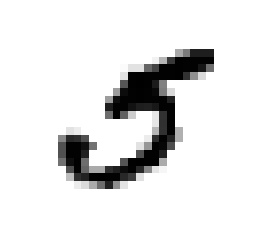

In [6]:
# We want to display a record:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [7]:
# It looks like a 5 and indeed that's what the label tells us.
y[36000]

5.0

In [8]:
# The MNIST data set is already split into test (last 10,000 images) and training (first 60,000 images) sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# Let’s also shuffle the training set; this will guarantee that all cross-validation folds will be similar
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier: SGDClassifier

In [10]:
# We want to train a classifier that distinguishes between the classes "5" and "not 5"
y_train_5 = (y_train == 5) # True for all 5s
y_test_5 = (y_test == 5)

In [11]:
# Next we have to actually train the classifier. In this case we pick the SGD (Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
# Now we can use the classifier to detect images of the number 5
# We can try it with the image of the 5 we looked at before
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures: Accuracy (Caution!), Precision and Recall

In [13]:
# ACCURACY
# For measuring classification models, we may want to have more control over cross validation
# The following code implements cross-validation for classification models
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9646


C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96775


C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96695


In [14]:
# Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation,
# with three folds. (achieves the same results as the score above)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([0.9646 , 0.96775, 0.96695])

In [15]:
# "DUMB" CLASSIFIER
# These accuracy values look good, but since 10% of the dataset are 5s, simply guessing "False" every
# time will get us about 90% accuracy. This demonstrates why accuracy is generally not the preferred
# performance measure.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# Let's find out the accuracy of this model
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90795, 0.90845, 0.91255])

In [16]:
# CONFUSION MATRIX
# A better way to evaluate the performance of a classifier is to look at the confusion matrix, i.e.
# the matrix that shows the number of times the classifier confused categories

# First we have to do the cross-validation predictions
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Now we're ready to construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([[53931,   648],
       [ 1366,  4055]], dtype=int64)

In [17]:
# PRECISION
# An interesting metric to look at is the accuracy of the positive predictions;
# this is called the precision of the classifier 
from sklearn.metrics import precision_score

precision_score(y_train_5, y_train_pred)

0.8622156070593239

In [27]:
# RECALL (TRUE POSITIVE RATE)
# Another interesting metric to look at is the recall (TRUE positive rate), i.e. the rate
# of how often the classifier chooses TRUE when the label is TRUE
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred)

0.7480169710385538

In [18]:
# F1 SCORE
# The F1 score is the harmonic mean of precision and recall.
# It will only score high if both metrics are high.

# The F1 score favors classifiers that have similar precision and recall. This is not always
# what you want: in some contexts you mostly care about precision, and in other con‐
# texts you really care about recall.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8010667720268669

In [19]:
# PRECISION/RECALL TRADEOFF
# We can explore the tradeoff between precision and recall by moving our classification threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([89304.7823487])

In [20]:
# Setting the threshold to 0 makes every classification output True
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [21]:
# Setting a higher threshold will change the boolean output
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [22]:
# So which threshold should we use?

# First off, we calculate the predictions of all instances of the training set 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Now with these scores you can compute precision and recall for all possible thresholds using
# the precision_recall_curve() function:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

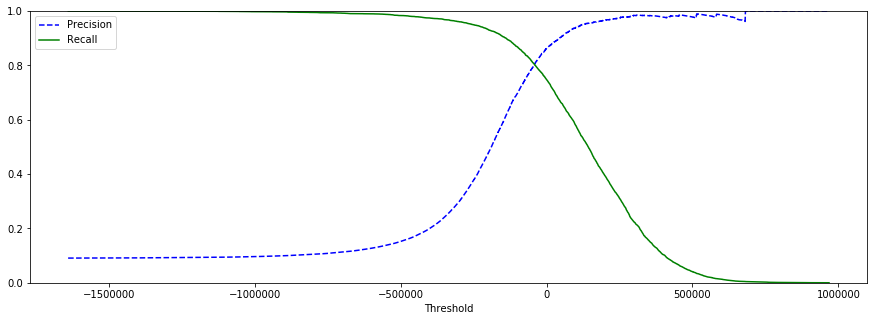

In [23]:
# Finally we can plot the precision-recall-curve and choose the right threshold for our project
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

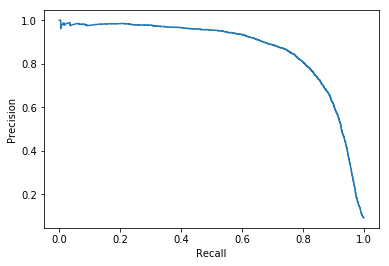

In [24]:
# Another way of choosing the right values is plotting Precision and Recall directly against each other
# We see a huge drop at around 80% recall and might want to choose a value just before that drop
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [25]:
# DECIDING ON A THRESHOLD
# So let’s suppose you decide to aim for 90% precision. You look up the first plot
# (zooming in a bit) and find that you need to use a threshold of about 70,000. To make
# predictions (on the training set for now), instead of calling the classifier’s predict()
# method, you can just run this code:
y_train_pred_90 = (y_scores > 70000)

# Let's check these predictions's precision...
precision_score(y_train_5, y_train_pred_90)

0.9209390178089585

In [28]:
# ... and recall
recall_score(y_train_5, y_train_pred_90)

0.6295886367828814

# Performance Measures: ROC Curve and AUC

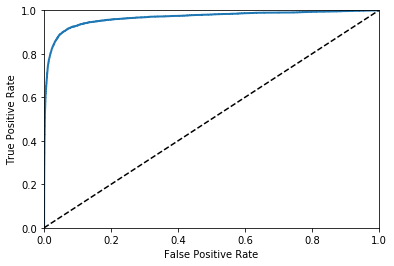

In [29]:
# The ROC curve plots the true positive rate (another name for recall) against the false positive rate.

# To plot the ROC curve, you first need to compute the TPR and FPR for various threshold
# values, using the roc_curve() function:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# Then you can plot the FPR against the TPR using Matplotlib.
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
# One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier
# will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9666768443525415

# Random Forest Classifier

In [31]:
# Scikit classifiers generally have a decision_function() method or a predict_proba() method
# Random Forest Classifiers use the predict_proba() method, which returns an array containing a row per instance and a column
# per class, each containing the probability that the given instance belongs to the given class
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

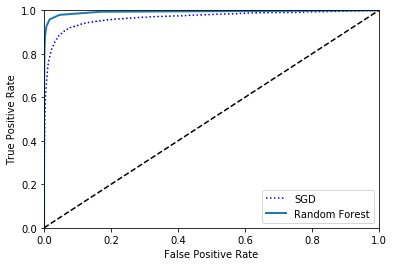

In [32]:
# But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
# use the positive class’s probability as the score:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Now we are ready to plot the ROC Curve. It is useful to plot the first ROC Curve as well to see how they compare
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
# The ROC curve hugs the upper left corner much more than the SGD. Let's calculate the AUC.
roc_auc_score(y_train_5, y_scores_forest)

0.9931917845130176

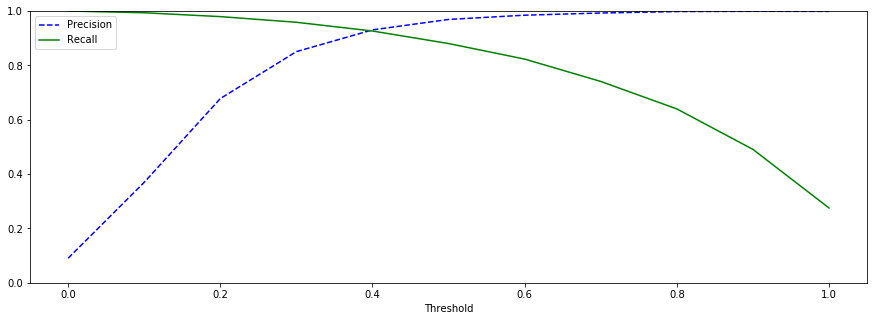

In [34]:
# We again want to check the Precision/Recall curve to set a threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [35]:
# To check the other metrics we have to set a threshold between 0 and 1. Maximizing F1 we would choose 0.4
y_rf_pred = (y_scores_forest > 0.4)

In [36]:
# Precision score for the Random Forest
precision_score(y_train_5, y_rf_pred)

0.9689340101522843

In [37]:
# Recall score for the Random Forest
recall_score(y_train_5, y_rf_pred)

0.8802803910717579

In [38]:
# F1 score for the Random Forest
f1_score(y_train_5, y_rf_pred)

0.9224821186932147

# Multi-Class Classification

In [39]:
# Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
# capable of handling multiple classes directly. Others (such as Support Vector Machine
# classifiers or Linear classifiers) are strictly binary classifiers. However, there are vari‐
# ous strategies that you can use to perform multiclass classification using multiple
# binary classifiers.

# Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
# size of the training set, so for these algorithms One vs One is preferred since it is faster to
# train many classifiers on small training sets than training few classifiers on large
# training sets. For most binary classification algorithms, however, One vs All is preferred.

# Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
# class classification task, and it automatically runs OvA (except for SVM classifiers for
# which it uses OvO). Let’s try this with the SGDClassifier:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [40]:
# Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
# image, and selected the class with the highest score.

# To see that this is indeed the case, you can call the decision_function() method.
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-161285.30064461, -464486.91979956, -493994.48984971,
        -150221.01195021, -528694.44527893,   89304.7823487 ,
        -849805.63734937, -283871.1569745 , -649916.78647191,
        -727682.32907911]])

In [41]:
# The highest score is indeed the one corresponding to class 5:
np.argmax(some_digit_scores)

5

In [42]:
# Check again which classes there are:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [43]:
# Class nr. 5:
sgd_clf.classes_[5]

5.0

In [44]:
# If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
# the OneVsOneClassifier or OneVsRestClassifier classes.
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([5.])

In [45]:
# Since every decision score is checked against each other decision score, we have got 45 decisions
len(ovo_clf.estimators_)

45

In [46]:
# Training a RandomForestClassifier is just as easy:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [47]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [48]:
# This time Scikit-Learn did not have to run OvA or OvO because Random Forest
# classifiers can directly classify instances into multiple classes. You can call
# predict_proba() to get the list of probabilities that the classifier assigned to each
# instance for each class:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [49]:
# Now of course you want to evaluate these classifiers. As usual, you want to use crossvalidation.
# Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score() function:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([0.84743051, 0.86624331, 0.85087763])

In [50]:
# SCALING
# It gets over 84% on all test folds. If you used a random classifier, you would get 10%
# accuracy, so this is not such a bad score, but you can still do much better. For example,
# simply scaling the inputs (as discussed in Chapter 2) increases accuracy above 90%:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([0.91041792, 0.91449572, 0.90503576])

# Error Analysis: Confusion Matrix

In [51]:
# We will assume that you have found a promising model and you want to find ways to improve it.
# One way to do this is to analyze the types of errors it makes.

# First, you can look at the confusion matrix. You need to make predictions using the
# cross_val_predict() function, then call the confusion_matrix() function, just like
# you did earlier:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Clem\Anaconda3\lib\site-p

array([[5729,    3,   21,   13,   12,   50,   43,    9,   41,    2],
       [   2, 6474,   44,   26,    6,   42,   10,   11,  115,   12],
       [  51,   35, 5325,  105,   88,   27,   91,   55,  165,   16],
       [  42,   44,  135, 5361,    4,  215,   33,   57,  142,   98],
       [  23,   27,   33,    7, 5398,   10,   48,   34,   81,  181],
       [  69,   40,   32,  200,   80, 4574,  117,   30,  193,   86],
       [  34,   22,   43,    3,   44,   93, 5628,    7,   44,    0],
       [  22,   18,   63,   28,   54,   10,    4, 5829,   16,  221],
       [  49,  148,   67,  160,   11,  149,   55,   28, 5048,  136],
       [  38,   29,   23,   87,  192,   36,    3,  223,   85, 5233]],
      dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

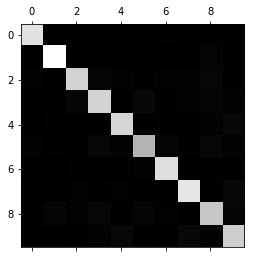

In [52]:
# That’s a lot of numbers. It’s often more convenient to look at an image representation
# of the confusion matrix, using Matplotlib’s matshow() function:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show

In [53]:
# This confusion matrix looks fairly good, since most images are on the main diagonal,
# which means that they were classified correctly. The 5s look slightly darker than the
# other digits, which could mean that there are fewer images of 5s in the dataset or that
# the classifier does not perform as well on 5s as on other digits. In fact, you can verify
# that both are the case.

In [54]:
# Let’s focus the plot on the errors. First, you need to divide each value in the confusion
# matrix by the number of images in the corresponding class, so you can compare error
# rates instead of absolute number of errors (which would make abundant classes look unfairly bad):
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

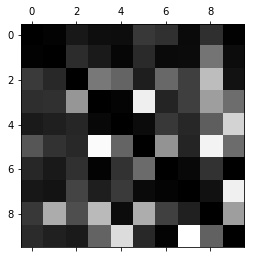

In [55]:
# Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result, where
# rows are actual classes
# columns are predicted classes
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
# INTERPRETATION
# The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as
# 8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s
# and 9s are often confused with other digits. Conversely, some rows are pretty dark,
# such as row 1: this means that most 1s are classified correctly (a few are confused
# with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for
# example, there are more 5s misclassified as 8s than the reverse.

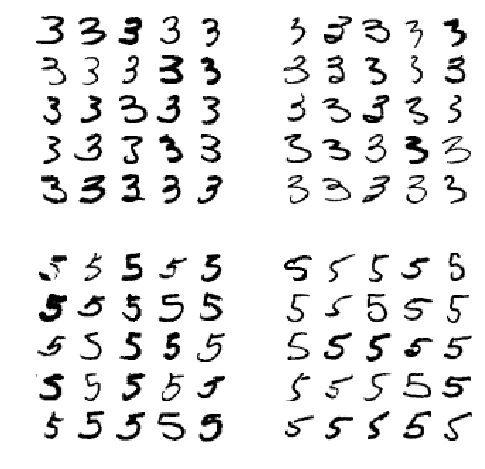

In [57]:
# Analyzing individual errors can also be a good way to gain insights on what your
# classifier is doing and why it is failing, but it is more difficult and time-consuming.
# For example, let’s plot examples of 3s and 5s:

#### HELPER FUNCTION ####
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
#### HELPER FUNCTION END ####

cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

In [58]:
# The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on
# the right show images classified as 5s.

# The reason is that we used a simple SGDClassifier, which is a linear model. All it does is assign a
# weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel
# intensities to get a score for each class. So since 3s and 5s differ only by a few
# pixels, this model will easily confuse them.

# SOLUTIONS:
    # Use a more complex model
    # Preprocess (e.g. rotate) the images

# Multilabel Classification

In [59]:
# We now want to train a classifier that can output multiple classes for a given input.
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
# Now our model will output two booleans: First, if the number is large and second if the number is odd.
# Our 5 we had previously is not large, but odd.
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# There are many ways to evaluate a multilabel classifier, and selecting the right metric
# really depends on your project. For example, one approach is to measure the F1 score
# for each individual label (or any other binary classifier metric discussed earlier), then
# simply compute the average score. This code computes the average F1 score across all labels:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
# To weight the different classes, we could type average="weighted" in the preceding code

# Multioutput Classification

In [60]:
# The multioutput classification is a classification task where each label can be multiclass

# To illustrate this, let’s build a system that removes noise from images. It will take as
# input a noisy digit image, and it will (hopefully) output a clean digit image, repre‐
# sented as an array of pixel intensities, just like the MNIST images. Notice that the
# classifier’s output is multilabel (one label per pixel) and each label can have multiple
# values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
# classification system.

In [74]:
# Let’s start by creating the training and test sets by taking the MNIST images and
# adding noise to their pixel intensities using NumPy’s randint() function. The target
# images will be the original images:
import random as rnd

noise = rnd.randint(0, 10)
noise = rnd.randint(0, 10)

X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

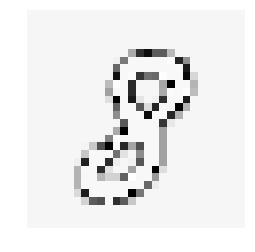

In [77]:
# Let’s take a peek at an image from the test set (yes, we’re snooping on the test data, so
# you should be frowning right now):
%matplotlib inline

some_index= X_train_mod[27000]
some_index_image = some_index.reshape(28, 28)

plt.imshow(some_index_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [ ]:
# Now let’s train the classifier and make it clean this image:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_train_mod[27000].reshape(1, -1))

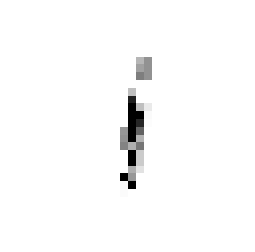

In [102]:
# We want to display a record:
%matplotlib inline
clean_digit_image = clean_digit.reshape(28, 28)

plt.imshow(clean_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [1]:
#### THE LAST TWO CODE BLOCKS DON'T WORK WELL!